<a href="https://colab.research.google.com/github/YadiraF/DECA/blob/master/Detailed_Expression_Capture_and_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# DECA: Detailed Expression Capture and Animation

Code in [![GitHub stars](https://img.shields.io/github/stars/yadiraf/DECA?style=social)](https://github.com/YadiraF/DECA)

Page at [![](https://img.shields.io/badge/Project-Page-blue?style=flat&logo=Google%20chrome&logoColor=blue)](https://deca.is.tue.mpg.de/)

Made by [![Yao](https://img.shields.io/twitter/follow/yaofeng1995?style=social)](https://twitter.com/yaofeng1995)

![extreme](https://deca.is.tue.mpg.de/uploads/ckeditor/pictures/642/content_teaser.gif)

</center>

Thanks [mhoangvslev](https://github.com/mhoangvslev) for contributing to this Colab document. 

# Setup

In [ ]:
%tensorflow_version 1.x

In [ ]:
#@title Setup dependencies

%cd /content/
!git clone https://github.com/yadiraf/DECA

%cd DECA/
!apt -q install -y zip unzip ffmpeg libsm6 libxext6
#!pip install -r requirements.txt
!pip install 'torch==1.6.0'
!pip install 'torchvision==0.7.0'
!pip install -q 'pytorch3d==0.2.5'
!pip install -q numpy scipy chumpy scikit-image opencv-python PyYAML face-alignment yacs kornia ninja fvcore
!pip install -q lucid>=0.2.3 gdown matplotlib
#!pip install --upgrade ipykernel

In [ ]:
#@title Download models
#@markdown By executing this cell, you agree to the [LICENSE](https://flame.is.tue.mpg.de/modellicense.html) provided by Max-Planck-Gesellschaft zur Förderung der Wissenschaften e.V

print("Downloading FLAME2020 model...")
!gdown --id 18eHkbq2W3aJJVUNTM3QwFK0dPaeNoRAz -O FLAME2020.zip
!unzip -o FLAME2020.zip -d data/

print("Downloading deca_model...")
!gdown --id 1rp8kdyLPvErw2dTmqtjISRVvQLj6Yzje -O data/deca_model.tar

# Face reconstruction

In [ ]:
#@title Run paper demo
print("Setting up...")
!pip install -q kornia==0.4.0 yacs==0.1.8 face_alignment ninja fvcore

print("Check for NVIDIA Driver...")
!nvidia-smi

print("Running experiments...")
import os
input_folder = "TestSamples/AFLW2000" #@param {type:"string"}
output_folder = os.path.join(input_folder, "results")
!python demos/demo_reconstruct.py -i $input_folder -s $output_folder --saveDepth True --saveObj True


In [ ]:
#@title Use your own image
#@markdown Upload your images to `upload` folder under `DECA`
print("Setting up...")
!pip install -q kornia yacs face_alignment ninja fvcore

print("Check for NVIDIA Driver...")
!nvidia-smi

print("Running experiments...")
import os
input_folder = "/content/" #@param {type:"string"}
output_folder = os.path.join(input_folder, "results")
!python demos/demo_reconstruct.py -i $input_folder -s $output_folder --saveDepth True --saveObj True

## show results 
print('visualize one exmaple below')
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
vispath_list = glob(output_folder+'/*_size.jpg')
for vispath in vispath_list:
  image = Image.open(vispath)
  plt.figure(figsize=(20, 20))
  plt.imshow(image)
  plt.axis("off");
  break
print(f'Please check all results in {output_folder}')


In [ ]:
#@title Download the result
import os
from google.colab import files

print(next(os.walk(output_folder)))
folders = [ os.path.join(output_folder, f) for f in next(os.walk(os.path.join(input_folder, 'results')))[1] ]

print(f'Download results...')
os.system(f'zip -r DECA_results.zip {" ".join(folders)}')
files.download("DECA_results.zip")

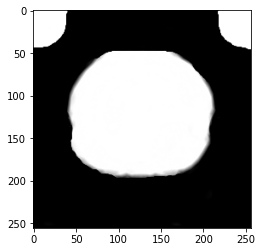

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('data/uv_face_eye_mask.png')
plt.imshow(img)